# Exploring AirBnB in Athens

*Assignment 1*  
*Business Analytics Practicum I*  
*Brikena Kokalari P2821811*

<font color=purple> 
## Load Data
We can load the CSV file by using following method:  </font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_csv('listings.csv', delimiter = ',')

In [3]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,10595,"96m2, 3BR, 2BA, Metro, WI-FI etc...",37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98888,23.76431,Entire home/apt,80,1,22,2019-08-07,0.21,6,304
1,10990,"50m2, Metro, WI-FI, cableTV, more",37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98783,23.76479,Entire home/apt,50,1,31,2019-04-21,0.35,6,337
2,10993,Athens Quality Apartments - Studio,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98861,23.76422,Entire home/apt,44,1,47,2019-04-17,0.54,6,326
3,10995,"47m2, close to metro,cable TV,wi-fi",37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98950,23.76356,Entire home/apt,50,1,19,2019-04-19,0.17,6,343
4,27262,"54m2, 1-br, cable tv, wi-fi, metro",37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98893,23.76475,Entire home/apt,50,1,16,2017-05-15,0.18,6,344


In [4]:
list(data)

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [5]:
data.isna().sum()

id                                    0
name                                  8
host_id                               0
host_name                             2
neighbourhood_group               11263
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        2273
reviews_per_month                  2273
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
print(f"Null values in 'neighbourhood_group': {round(100*data.neighbourhood_group .isna().sum()/len(data),1)}%")
#drop neighbourhood_group since it has na values
data.drop(['neighbourhood_group'], axis=1, inplace=True)

Null values in 'neighbourhood_group': 100.0%


## Neighbourhood Listings in Descending Order

<font color=blue> 
Q1:Show the listings per neighbourghood, with the most popular neighbourhoods first (that is, in decreasing neighbourhood popularity order).  </font>

<font color=purple> 
Simple count and group by expression will be enough to solve this one. In order to find the neighbourhoods that are popular,we group by the neighbourhood, and then count the listing IDs that are located in each neibourhood. Obviously, the center of Athens that incloudes Plaka, Koukaki, Exarxeia ect seems to have more listings, and that makes them more popular. </font>

In [7]:
df = data[['neighbourhood','id']].groupby(['neighbourhood'])['id'] \
                             .count() \
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False) \

In [8]:
df.head(20)

,neighbourhood,count
15,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,1788
23,ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ,949
26,ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ,881
28,ΝΕΟΣ ΚΟΣΜΟΣ,837
2,ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,740
30,ΠΑΓΚΡΑΤΙ,524
36,ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ,511
21,ΚΟΛΩΝΑΚΙ,413
5,ΑΚΡΟΠΟΛΗ,406
6,ΑΜΠΕΛΟΚΗΠΟΙ,367


## Neighbourhood Prices in Descending Order

<font color=blue> 
Create a table with the prices per neighbourhood. The prices information should contain:

* median price per neighbourhood

* mean price per neighbourhood

* standard deviation per neighbourhood

* number of listings per neighbourhood.

The contents of the table should be in descending median prices. </font>

<font color=purple> 
Use groupby the neighbourhood and aggregrate on price to find  some basic statistics and calculations on our pandas DataFrame.
To keep neibourhood as a colum we'll use the reset_index() method so that although we group by neibourhood,
we get a numerical index. </font>

In [9]:

df2 = data.groupby('neighbourhood').agg({'price': ['median', 'mean', 'std', 'size']}).reset_index()
df2.columns = ['neibourhood', 'Median', 'mean', 'standard_deviation', 'Sum_of_neigbourhood']
df2= df2.sort_values('Median',ascending=False)
#round for pretty print
df2=np.round(df2, decimals=2)
#df2
df2.head(5)

,neibourhood,Median,mean,standard_deviation,Sum_of_neigbourhood
39,ΡΗΓΙΛΛΗΣ,74.0,96.25,77.51,16
15,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,70.0,91.48,86.96,1788
21,ΚΟΛΩΝΑΚΙ,65.0,82.19,61.14,413
5,ΑΚΡΟΠΟΛΗ,60.0,83.48,78.58,406
17,ΘΗΣΕΙΟ,60.0,80.47,65.70,316


## Availability per Day

<font color=blue> 
Create a plot with the number of listings available per day, on the $y$ axis, and the date, on the $x$ axis. </font>

<font color=purple> 
To solve this one, we have to read the csv file with the calendar data, and keep only this rows that listings are available (True).After reading the initial calendar csv ,we created another dataframe keeping only the records with that are available and ploted listings available per day, on the  𝑦  axis, and the date, on the  𝑥  axis. </font>

In [10]:
calendar = pd.read_csv('calendar.csv', delimiter = ',', parse_dates=['date'])
calendar.head(10)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,10595,2019-11-19,f,$59.00,$59.00,1,45
1,10595,2019-11-20,f,$59.00,$59.00,1,45
2,10595,2019-11-21,f,$59.00,$59.00,1,45
3,10595,2019-11-22,f,$59.00,$59.00,1,45
4,10595,2019-11-23,f,$59.00,$59.00,1,45
5,10595,2019-11-24,f,$59.00,$59.00,1,45
6,10595,2019-11-25,f,$59.00,$59.00,1,45
7,10595,2019-11-26,f,$59.00,$59.00,1,45
8,10595,2019-11-27,f,$59.00,$59.00,1,45
9,10595,2019-11-28,f,$59.00,$59.00,1,45


In [11]:
#select rows whose value equals true
cl=calendar.loc[calendar['available'] == 't']
cl

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
44,10595,2020-01-02,t,$59.00,$59.00,2,45
45,10595,2020-01-03,t,$59.00,$59.00,2,45
46,10595,2020-01-04,t,$59.00,$59.00,2,45
47,10595,2020-01-05,t,$59.00,$59.00,2,45
48,10595,2020-01-06,t,$59.00,$59.00,1,45
49,10595,2020-01-07,t,$59.00,$59.00,1,45
50,10595,2020-01-08,t,$59.00,$59.00,1,45
51,10595,2020-01-09,t,$59.00,$59.00,1,45
52,10595,2020-01-10,t,$59.00,$59.00,2,45
53,10595,2020-01-11,t,$59.00,$59.00,2,45


In [12]:
cl= cl.sort_values('date',ascending=True)
daily = cl.groupby(cl.date)
len(daily)


365

In [13]:
y = daily.size()
y.head(5)

date
2019-11-19    3306
2019-11-20    4988
2019-11-21    5184
2019-11-22    4883
2019-11-23    4844
dtype: int64

In [14]:
x = daily.date.first()

Text(0, 0.5, 'Number of Listings')

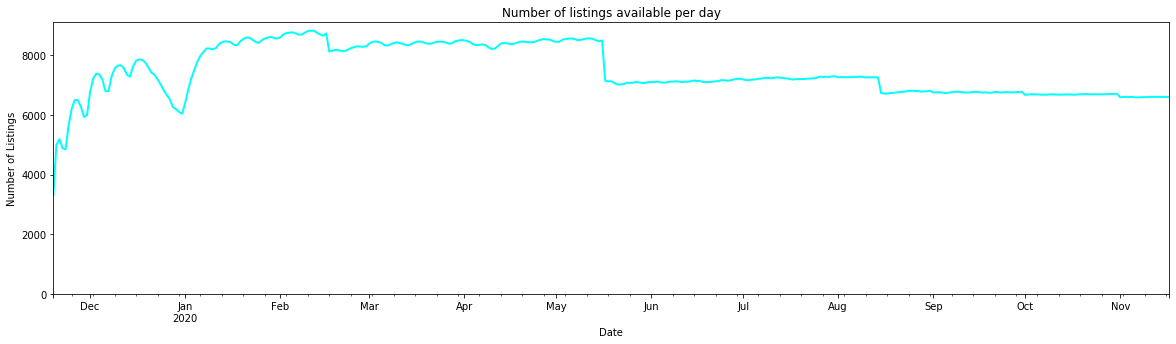

In [15]:
# We use the indices of x and the values of y
pd.Series(y.values, index=x).plot(figsize=(20, 5),
                                  color='aqua', linewidth=2, kind='line', title='Number of listings available per day') 
plt.ylim(0) # Set the lower y value to 0
plt.xlabel('Date') # Label of the x axis
plt.ylabel('Number of Listings') # Label of the y axis

<font color=purple>
The code below is showing another implementation with bars, where on the X axis dates are shown in YYYY-MM-DD format, instead of Month as above :) </font>

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
#select rows whose value equals true
cl=calendar.loc[calendar['available'] == 't']
daily = cl.groupby(cl.date)
df = pd.DataFrame({'Num_of_listings_per_day':y,}).reset_index()
df.head(3)

,date,Num_of_listings_per_day
0,2019-11-19,3306
1,2019-11-20,4988
2,2019-11-21,5184


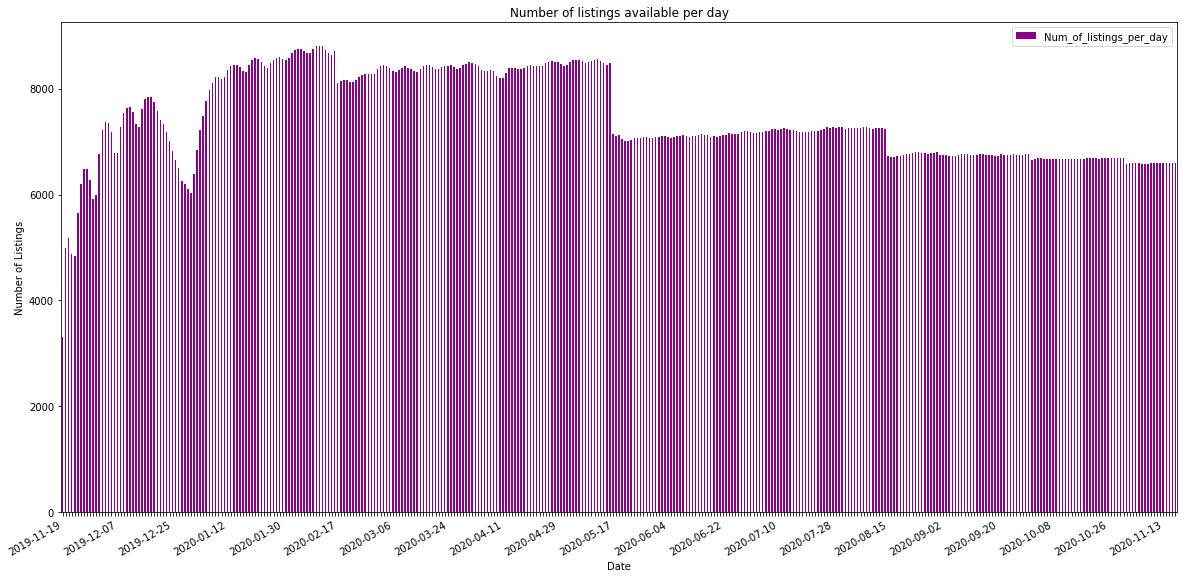

In [17]:
fig, ax = plt.subplots()
df.plot(x='date', y='Num_of_listings_per_day', ax=ax, figsize=(20, 10), color='darkmagenta', linewidth=3,kind='bar')
ticklabels = ['']*len(df)
skip = len(df)//20
ticklabels[::skip] = df['date'].iloc[::skip].dt.strftime('%Y-%m-%d')
ax.xaxis.set_major_formatter(mticker.FixedFormatter(ticklabels))
fig.autofmt_xdate()
plt.ylim(0) # Set the lower y value to 0
plt.xlabel('Date') # Label of the x axis
plt.ylabel('Number of Listings') # Label of the y axis
ax.set_title('Number of listings available per day')
# fixes the tracker
# https://matplotlib.org/users/recipes.html
def fmt(x, pos=0, max_i=len(ticklabels)-1):
    i = int(x) 
    i = 0 if i < 0 else max_i if i > max_i else i
    return dates[i]
ax.fmt_xdata = fmt
plt.show()

## Reviews, Occupacy per Listing, Average Income



<font color=blue>
Create a histogram showing the number of reviews per listing. The histogram should bin the number of reviews, from the smallest amount of reviews in a listing, to the maximum number of reviews in a listing rounded up to the closest hundred.
</font>

<font color=purple>
From the initial file with the listings, we created a new dataframe keeping only the id and number of reviews, sorting the latter in ascending order.We created a new column in our dataframe, with the rounded number of revies per listing, up to the closest houndred. Then we ploted the data using the histogram plot of matplotlib. </font>

In [18]:
rv = data[['id','number_of_reviews']]

In [19]:
rv.isna().sum()

id                   0
number_of_reviews    0
dtype: int64

In [20]:
rv.columns = ['id', 'Number_of_reviews']
rv=rv.sort_values('Number_of_reviews', ascending=True)
rv.tail()

,id,Number_of_reviews
236,1484797,534
621,6101639,550
302,2306865,598
184,1079291,603
194,1177492,694


In [21]:
import math
rv['Rounded_Num_of_Reviews'] = rv['Number_of_reviews'].apply(lambda x: int(round(x / 100.0)) * 100)
rv.tail(10)

,id,Number_of_reviews,Rounded_Num_of_Reviews
259,1751520,480,500
736,7215898,498,500
258,1746907,521,500
301,2305770,531,500
393,3431705,533,500
236,1484797,534,500
621,6101639,550,600
302,2306865,598,600
184,1079291,603,600
194,1177492,694,700


<font color=purple>
We can group by the data just to be sure that the histogram corresponds to the actual data. </font>

In [22]:
rv2 = rv.groupby(['Rounded_Num_of_Reviews']).agg({'id': ['size']}).reset_index()
rv2.columns = [ 'Number_of_reviews', 'Sum_listing_ids']


In [23]:
rv2

,Number_of_reviews,Sum_listing_ids
0,0,8739
1,100,1917
2,200,433
3,300,130
4,400,31
5,500,9
6,600,3
7,700,1


<font color=purple>
As we can see below, the data are not symmetric. The histogram is highly skewed to the right (also known as positively skewed) and that means that there are many listing with total number of reviews less than 100 amd a few listing with many reviews. </font>

In [24]:
print(plt.style.available) #see the available styles of plot 

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


In [25]:
plt.style.use('dark_background')

Text(0, 0.5, 'Num_listing_ids')

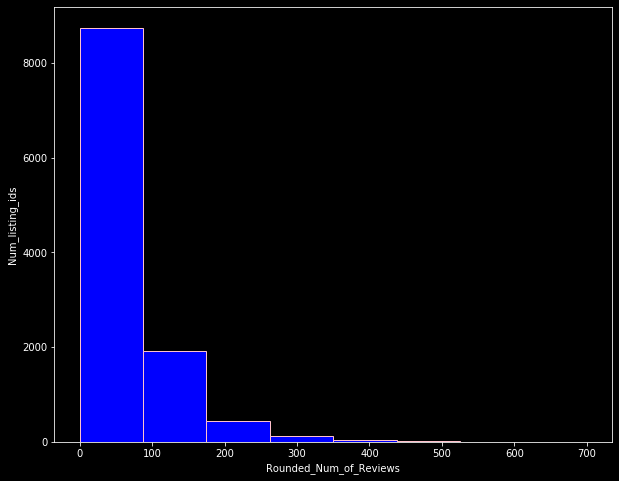

In [26]:
x = rv['Rounded_Num_of_Reviews']
plt.figure(figsize=(10,8))
plt.hist( x , bins=8, color='blue', edgecolor='black',  ec="pink")
plt.xlabel('Rounded_Num_of_Reviews')
plt.ylabel('Num_listing_ids')

<font color=blue>
Once you have done that, calculate the average occupacy per listing per month. To calculate that, find the average reviews per month and assume that half of the bookings result in reviews. 

Then, assuming that each booking is for a three nights stay, calculate the average income per month, using the average price charged throughout all listings.</font>

<font color=purple>
To solve this one, we have to read the listing file with all the description data and have a look at it. We can loosely interpret number of reviews as times people have stayed in the said listing. Of course, this depends on when the listing appeared, how long it appeared for, and various other factors. </font>

In [27]:
import numpy as np
import pandas as pd
import webbrowser
df = pd.read_csv('listingsall.csv', delimiter = ',')
df

c:\users\brikena kokalari\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,10595,https://www.airbnb.com/rooms/10595,20191119140440,2019-11-19,"96m2, 3BR, 2BA, Metro, WI-FI etc...",Athens Furnished Apartment No6 is 3-bedroom ap...,Athens Furnished Apartment No6 is an excellent...,Athens Furnished Apartment No6 is 3-bedroom ap...,none,Ampelokipi district is nice multinational and ...,...,t,f,moderate,f,f,6,6,0,0,0.21
1,10990,https://www.airbnb.com/rooms/10990,20191119140440,2019-11-19,"50m2, Metro, WI-FI, cableTV, more",Athens Furnished Apartment No3 is 1-bedroom ap...,Athens Furnished Apartment No3 is an excellent...,Athens Furnished Apartment No3 is 1-bedroom ap...,none,Ampelokipi district is nice multinational and ...,...,t,f,moderate,f,f,6,6,0,0,0.35
2,10993,https://www.airbnb.com/rooms/10993,20191119140440,2019-11-19,Athens Quality Apartments - Studio,The Studio is an -excellent located -close t...,"AQA No1 is an excellent located, close to metr...",The Studio is an -excellent located -close t...,none,Ampelokipi district is nice multinational and ...,...,t,f,moderate,f,f,6,6,0,0,0.54
3,10995,https://www.airbnb.com/rooms/10995,20191119140440,2019-11-19,"47m2, close to metro,cable TV,wi-fi",AQA No2 is 1-bedroom apartment (47m2) -excell...,"AQA No2 is an excellent located, close to metr...",AQA No2 is 1-bedroom apartment (47m2) -excell...,none,Ampelokipi district is nice multinational and ...,...,t,f,moderate,f,f,6,6,0,0,0.17
4,27262,https://www.airbnb.com/rooms/27262,20191119140440,2019-11-19,"54m2, 1-br, cable tv, wi-fi, metro",Big 1-bedroom apartment that can accommodate 4...,-We have 9 apartments. 8 of them are on the sa...,Big 1-bedroom apartment that can accommodate 4...,none,NaN,...,t,f,moderate,f,f,6,6,0,0,0.18
5,28186,https://www.airbnb.com/rooms/28186,20191119140440,2019-11-19,❤️Deluxe central loft near Acropolis❤️,TOP 5 REASONS to stay here ⭐️Don't waste your ...,"Recently renovated New York style loft, privil...",TOP 5 REASONS to stay here ⭐️Don't waste your ...,none,"Don't look any further. This is, by far, the ...",...,t,f,strict_14_with_grace_period,f,t,2,2,0,0,4.88
6,31155,https://www.airbnb.com/rooms/31155,20191119140440,2019-11-19,sleep on sailing boat,NaN,"on beautiful island of Aigina, 30 minutes from...","on beautiful island of Aigina, 30 minutes from...",none,NaN,...,f,f,flexible,f,f,1,0,1,0,NaN
7,33704,https://www.airbnb.com/rooms/33704,20191119140440,2019-11-19,"Artist's studio in Athens, safe area, near metro",Airport metro line (4min walk to station) Safe...,"The one room apartment is 35 square meters, SU...",Airport metro line (4min walk to station) Safe...,none,The home is on the 4th floor of a corner build...,...,f,f,flexible,f,f,1,1,0,0,1.39
8,33945,https://www.airbnb.com/rooms/33945,20191119140440,2019-11-19,Spacious Cosy aprtm very close to Metro!,Apartment located near metro station. Safe nei...,Ideally located in a safe and lively area in t...,Apartment located near metro station. Safe nei...,none,Neighbourhood is alive all day and safe all da...,...,f,f,strict_14_with_grace_period,f,f,2,2,0,0,0.64
9,38100,https://www.airbnb.com/rooms/38100,20191119140440,2019-11-19,Stay at the heart of Athens (100m²),Located in one of the most luxurious and safer...,"It is adjacent to Panathinaic Stadium, Zappeio...",Located in one of the most luxurious and safer...,none,NaN,...,t,f,flexible,f,f,2,2,0,0,1.74


In [28]:
df.isna().sum()

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
name                                                8
summary                                           316
space                                            2745
description                                       165
experiences_offered                                 0
neighborhood_overview                            3060
notes                                            6640
transit                                          3300
access                                           5293
interaction                                      4303
house_rules                                      5609
thumbnail_url                                   11263
medium_url                                      11263
picture_url                                         0
xl_picture_url              

<font color=purple>
 We created a new dataframe, keeping only the columns id and reviews per month. However the latter column had enough Na values. To tackle this problem, we filled in the rows with Na values with the mean of the column Reviews per month. Also, we made the assumption that half of the booking result in reviews and that's why we decided to multiply the number of reviews per month with 2 and store the output in a new column.</font>

In [29]:
df1 = df[['id','reviews_per_month']]

In [30]:
df1.isna().sum()

id                      0
reviews_per_month    2273
dtype: int64

In [31]:
df1.dtypes

id                     int64
reviews_per_month    float64
dtype: object

In [32]:
df1[df1.columns] = df1[df1.columns].apply(pd.to_numeric, errors='coerce')
df1.fillna(df1.mean(), inplace=True)

c:\users\brikena kokalari\appdata\local\programs\python\python36\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
c:\users\brikena kokalari\appdata\local\programs\python\python36\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [33]:
df1['occupancy']= df1[['reviews_per_month']]*2

c:\users\brikena kokalari\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [34]:
import numpy as np
np.round(df1, decimals=1)

,id,reviews_per_month,occupancy
0,10595,0.2,0.4
1,10990,0.4,0.7
2,10993,0.5,1.1
3,10995,0.2,0.3
4,27262,0.2,0.4
5,28186,4.9,9.8
6,31155,2.3,4.6
7,33704,1.4,2.8
8,33945,0.6,1.3
9,38100,1.7,3.5


<font color=purple>
To calculate the money that a hoster makes per month, sssuming that each booking is for a three night stay, we can multiply the column of occupancy with 3 and then with the average price of every listing available. </font>

In [35]:
#Let's see the average price of every listing available
average_price = sum(data.price) / float(len(data.price))
average_price #65.96

65.95578442688449

In [36]:
df1['money']= df1[['occupancy']]*65.96*3
df1.money = df1.money.round()

c:\users\brikena kokalari\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\brikena kokalari\appdata\local\programs\python\python36\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [37]:
df1.head()

,id,reviews_per_month,occupancy,money
0,10595,0.21,0.42,83.0
1,10990,0.35,0.70,139.0
2,10993,0.54,1.08,214.0
3,10995,0.17,0.34,67.0
4,27262,0.18,0.36,71.0


<font color=purple>
The second approach that I tried, which seems to be more reliable to use, is shown below.Firstly, from the reviews file, I tried to extract the date of the first and the date of the last review for each listing. Then I calculated the difference  in years between the two dates to find for how many years was the listing in Airbnb Platfrom (supposing that in the first month in the platform, the listing got the first review). After that, I  tried to pivot the data per listing id and per month, count the reviews  listing id/month and then to divide the total number of reviews pivoted per linting id/month with the number of years that each listing was available in Airbnb (calculated above), executing the formula of avg=sum/count.
Due to the limited time available I did not manage to finish it. </font>

In [38]:
import datetime
df= pd.read_csv('reviews.csv', delimiter = ',', parse_dates=['date'])
df=pd.merge(df,df.groupby("listing_id").max().reset_index(), on='listing_id',how='left')
df.columns = ['listing_id', 'date', 'max']

df.head(2)

,listing_id,date,max
0,10595,2011-05-20,2019-08-07
1,10595,2012-08-15,2019-08-07


In [39]:
df=pd.merge(df,df.groupby("listing_id").min().reset_index(), on='listing_id')


In [40]:
del df['max_y']
df.columns = ['listing_id', 'date', 'max', 'min']
df.head()

,listing_id,date,max,min
0,10595,2011-05-20,2019-08-07,2011-05-20
1,10595,2012-08-15,2019-08-07,2011-05-20
2,10595,2013-05-20,2019-08-07,2011-05-20
3,10595,2014-05-04,2019-08-07,2011-05-20
4,10595,2014-09-13,2019-08-07,2011-05-20


In [41]:
df['diff']=df['max'].apply(lambda x: x.year) - df['min'].apply(lambda x: x.year)

In [42]:
df.dtypes

listing_id             int64
date          datetime64[ns]
max           datetime64[ns]
min           datetime64[ns]
diff                   int64
dtype: object

In [43]:
df['diff_nom']=df['diff']+1 #for listings that the year of the first and the last review is the same

In [44]:
df

,listing_id,date,max,min,diff,diff_nom
0,10595,2011-05-20,2019-08-07,2011-05-20,8,9
1,10595,2012-08-15,2019-08-07,2011-05-20,8,9
2,10595,2013-05-20,2019-08-07,2011-05-20,8,9
3,10595,2014-05-04,2019-08-07,2011-05-20,8,9
4,10595,2014-09-13,2019-08-07,2011-05-20,8,9
5,10595,2015-04-25,2019-08-07,2011-05-20,8,9
6,10595,2015-05-17,2019-08-07,2011-05-20,8,9
7,10595,2015-05-25,2019-08-07,2011-05-20,8,9
8,10595,2015-09-23,2019-08-07,2011-05-20,8,9
9,10595,2015-12-29,2019-08-07,2011-05-20,8,9


In [45]:
del df['diff']
del df['min']
del df['max']
df.head()

,listing_id,date,diff_nom
0,10595,2011-05-20,9
1,10595,2012-08-15,9
2,10595,2013-05-20,9
3,10595,2014-05-04,9
4,10595,2014-09-13,9


In [46]:
df['date_month']=df.date.dt.strftime('%m')
df.head(2)

,listing_id,date,diff_nom,date_month
0,10595,2011-05-20,9,05
1,10595,2012-08-15,9,08


In [47]:
df.pivot_table(index=['listing_id'], columns=['date_month'], aggfunc =len,  fill_value=0)

date                                      ... diff_nom              \
date_month   01  02  03  04  05  06  07  08  09  10  ...       03  04  05  06   
listing_id                                           ...                        
10595         1   0   1   3   5   2   1   3   2   1  ...        1   3   5   2   
10990         5   4   2   4   1   0   0   0   2   4  ...        2   4   1   0   
10993        10   6   3   3   2   3   2   1   3   3  ...        3   3   2   3   
10995         2   0   0   4   0   2   1   1   0   1  ...        0   4   0   2   
27262         1   0   0   0   4   1   0   0   2   0  ...        0   0   4   1   
28186        20  21  14  31  50  47  51  54  54  55  ...       14  31  50  47   
33704         2   0   2   0   4   4   9   3   9   2  ...        2   0   4   4   
33945         4   0   3   5   8   9  13  14   8   4  ...        3   5   8   9   
38100        11   7   6  12  25  26  28  22  24  21  ...        6  12  25  26   
40149        11   9  19  30  35  30  32  40  36  33  ...       19  30  35  30   
40150         7   4   3  11  19  13  18  19  16  14  ...        3  11  19  13   
44858         2   3   7  16  31  25  28  14  15  13  ...        7  16  31  25   
48635         6   8   5  15  26  25  23  14  23  19  ...        5  15  26  25   
49489         5   5   5  10  11  14  23  12  14  13  ...        5  10  11  14   
54637         0   1   0   0   0   1   0   1   0   0  ...        0   0   0   1   
59663        19  11  19  42  39  35  44  70  41  33  ...       19  42  39  35   
60394         0   0   1   1   2   0   0   1   1   3  ...        1   1   2   0   
80598        28  28  25  22  41  49  48  46  38  32  ...       25  22  41  49   
81230         7   5   8  14  14  19  14  18   9  13  ...        8  14  14  19   
82239         0   0   1   1   2   0   1   1   1   0  ...        1   1   2   0   
83097         1   1   0   0   4   2   5   2   2   2  ...        0   0   4   2   
85400         1   0   3   5   4   5   6   6   4   6  ...        3   5   4   5   
119682        1   1   4   9  23  25  23   4  17  12  ...        4   9  23  25   
131133        1   1   1   3   6   8   3   0   2   1  ...        1   3   6   8   
133906        1   1   1   3   2   9   7   1   5   5  ...        1   3   2   9   
138386        2   1   4   4   9   8  12   5   6   4  ...        4   4   9   8   
144482        3   1   0   8   8   2   5   4   4   4  ...        0   8   8   2   
145282        0   0   0   4   6   0   2   2   4   6  ...        0   4   6   0   
145478        7   2   3   5   8   2   8   6  11   3  ...        3   5   8   2   
154243        1   4   4  19  22  28  22  25  31  13  ...        4  19  22  28   
...         ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...      ...  ..  ..  ..   
39716272      0   0   0   0   0   0   0   0   0   0  ...        0   0   0   0   
39717101      0   0   0   0   0   0   0   0   0   0  ...        0   0   0   0   
39717339      0   0   0   0   0   0   0   0   0   0  ...        0   0   0   0   
39726763      0   0   0   0   0   0   0   0   0   0  ...        0   0   0   0   
39739990      0   0   0   0   0   0   0   0   0   0  ...        0   0   0   0   
39745315      0   0   0   0   0   0   0   0   0   0  ...        0   0   0   0   
39748921      0   0   0   0   0   0   0   0   0   0  ...        0   0   0   0   
39749508      0   0   0   0   0   0   0   0   0   0  ...        0   0   0   0   
39749940      0   0   0   0   0   0   0   0   0   0  ...        0   0   0   0   
39762222      0   0   0   0   0   0   0   0   0   0  ...        0   0   0   0   
39764577      0   0   0   0   0   0   0   0   0   0  ...        0   0   0   0   
39788332      0   0   0   0   0   0   0   0   0   0  ...        0   0   0   0   
39788683      0   0   0   0   0   0   0   0   0   0  ...        0   0   0   0   
39788870      0   0   0   0   0   0   0   0   0   0  ...        0   0   0   0   
39790723      0   0   0   0   0   0   0   0   0   0  ...        0   0   0   0   
39813096      0   0   0   0   0   0   0   

In [48]:
result = df.groupby(['listing_id', 'date_month']).agg({'date_month': ['size']}).unstack()
result.head()

date_month                                                       
                 size                                                       
date_month         01   02   03   04   05   06   07   08   09   10   11   12
listing_id                                                                  
10595             1.0  NaN  1.0  3.0  5.0  2.0  1.0  3.0  2.0  1.0  NaN  3.0
10990             5.0  4.0  2.0  4.0  1.0  NaN  NaN  NaN  2.0  4.0  2.0  7.0
10993            10.0  6.0  3.0  3.0  2.0  3.0  2.0  1.0  3.0  3.0  2.0  9.0
10995             2.0  NaN  NaN  4.0  NaN  2.0  1.0  1.0  NaN  1.0  2.0  6.0
27262             1.0  NaN  NaN  NaN  4.0  1.0  NaN  NaN  2.0  NaN  1.0  7.0

## Listings per Room Type

<font color=blue>
    
Show the number of listings per room type, in absolute numbers, and also in percentages (the percentage of listings for each particular room type). Then, show the number of listings per neighrbourhood and room type. </font>

<font color=purple>
To answer this one, we created a new dataframe from the initial one with the listing, and having grouped by the room type,we counted the number of listing ids. To calculate the percentage, we applied the formula count/total. So in this case, the percentage of room type e.g "entire home/apt" would be the total listing of those room type divided with the total number of listings. </font>

In [49]:
df1 = data[['room_type','id']].groupby(['room_type'])['id'] \
                             .count() \
                             .reset_index(name='count1') \


In [50]:
df1['prsg'] = df1.count1 / df1.count1.sum()
df1=df1.round({'prsg':2}) #round for pretty print
df1

,room_type,count1,prsg
0,Entire home/apt,9874,0.88
1,Hotel room,291,0.03
2,Private room,1040,0.09
3,Shared room,58,0.01


<font color=purple>
Then, to show the number of listings per neighrbourhood and room type, we created an new dataframe from the initial one with the listing, keeping only the columns id, heighbourhood and room type. Then  we grouped by the neighbourhood first and then with the rrom type and counted on the listing ids. </font>

In [51]:

df3= data[['id','neighbourhood', 'room_type']]
grouped = df3.groupby(['neighbourhood', 'room_type'])
grouped.agg(['size'])

id
                                                 size
neighbourhood                    room_type           
1Ο ΝΕΚΡΟΤΑΦΕΙΟ                   Entire home/apt   48
                                 Private room       2
ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ                 Entire home/apt   28
                                 Private room       3
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ Entire home/apt  601
                                 Hotel room         5
                                 Private room     129
                                 Shared room        5
ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ                   Entire home/apt   73
                                 Private room       9
ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ                Entire home/apt   75
                                 Private room      11
                                 Shared room        2
ΑΚΡΟΠΟΛΗ                         Entire home/apt  385
                                 Hotel room         7
                                 Private room      14
ΑΜΠΕΛΟΚΗΠΟΙ                      Entire home/apt  347
                                 Private room      19
                                 Shared room        1
ΑΝΩ ΚΥΨΕΛΗ                       Entire home/apt   81
                                 Private room       5
ΑΝΩ ΠΑΤΗΣΙΑ                      Entire home/apt   67
                                 Hotel room         2
                                 Private room       7
ΒΟΤΑΝΙΚΟΣ                        Entire home/apt   81
                                 Private room       7
                                 Shared room        2
ΓΚΑΖΙ                            Entire home/apt   96
                                 Private room       9
                                 Shared room        1
...                                               ...
ΠΕΔΙΟ ΑΡΕΩΣ                      Entire home/apt   83
                                 Hotel room         5
                                 Private room      14
ΠΕΝΤΑΓΩΝΟ                        Entire home/apt    5
ΠΕΤΡΑΛΩΝΑ                        Entire home/apt  298
                                 Hotel room         2
                                 Private room      24
                                 Shared room        1
ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ                 Entire home/apt  115
                                 Private room      13
ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ                  Entire home/apt  441
                                 Hotel room         3
                                 Private room      65
                                 Shared room        2
ΠΟΛΥΓΩΝΟ                         Entire home/apt   26
                                 Private room       8
ΠΡΟΜΠΟΝΑ                         Entire home/apt   11
                                 Private room       2
ΡΗΓΙΛΛΗΣ                         Entire home/apt   15
                                 Private room       1
ΡΙΖΟΥΠΟΛΗ                        Entire home/apt   11
                                 Private room       4
ΣΕΠΟΛΙΑ                          Entire home/apt   27
                                 Private room       4
ΣΤΑΔΙΟ                           Entire home/apt  235
                                 Private room      15
ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ                  Entire home/apt   51
                                 Hotel room         3
                                 Private room      13
                                 Shared room        3

[127 rows x 1 columns]

## Prices per Day

<font color=blue>
    
Create a table with the average price per listing per day. Draw a graph visualizing the table. </font>

<font color=purple>
To solve this one, we only have to group by the date and calculate the average on price. However, the price column datatype is not int or float and that's why we have to transform it to float. </font>

In [52]:
import pandas as pd
import numpy as np
import re
calendar = pd.read_csv('calendar.csv', delimiter = ',', parse_dates=['date'])
calendar.dtypes

listing_id                 int64
date              datetime64[ns]
available                 object
price                     object
adjusted_price            object
minimum_nights             int64
maximum_nights             int64
dtype: object

In [53]:
calendar.isna().sum()

listing_id         0
date               0
available          0
price             17
adjusted_price    17
minimum_nights     0
maximum_nights     0
dtype: int64

In [54]:
calendar['Prices_fixed']=calendar['price'].replace( '[\$,)]','', regex=True).astype(float)
cl_fixed = calendar[calendar.Prices_fixed >= 0]#check if the listing is not free :)

In [55]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,Prices_fixed
0,10595,2019-11-19,f,$59.00,$59.00,1,45,59.0
1,10595,2019-11-20,f,$59.00,$59.00,1,45,59.0
2,10595,2019-11-21,f,$59.00,$59.00,1,45,59.0
3,10595,2019-11-22,f,$59.00,$59.00,1,45,59.0
4,10595,2019-11-23,f,$59.00,$59.00,1,45,59.0


In [56]:
calendar[calendar['Prices_fixed'].isnull()] # check for na values and then delete them

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,Prices_fixed
1361910,21615380,2020-11-01,f,NaN,NaN,1,1125,NaN
1361911,21615380,2020-11-02,f,NaN,NaN,1,1125,NaN
1361912,21615380,2020-11-03,f,NaN,NaN,1,1125,NaN
1361913,21615380,2020-11-04,f,NaN,NaN,1,1125,NaN
1361914,21615380,2020-11-05,f,NaN,NaN,1,1125,NaN
1361915,21615380,2020-11-06,f,NaN,NaN,1,1125,NaN
1361916,21615380,2020-11-07,f,NaN,NaN,1,1125,NaN
1361917,21615380,2020-11-08,f,NaN,NaN,1,1125,NaN
1361918,21615380,2020-11-09,f,NaN,NaN,1,1125,NaN
1361919,21615380,2020-11-10,f,NaN,NaN,1,1125,NaN


In [57]:
calendar.dtypes

listing_id                 int64
date              datetime64[ns]
available                 object
price                     object
adjusted_price            object
minimum_nights             int64
maximum_nights             int64
Prices_fixed             float64
dtype: object

In [58]:
#group by  date kai find the avg price
cl2 = calendar.groupby('date').agg({'Prices_fixed': [ 'mean']}).reset_index()
cl2.columns = ['Date', 'Mean']
cl2.head()

,Date,Mean
0,2019-11-19,59.257480
1,2019-11-20,59.416763
2,2019-11-21,59.306845
3,2019-11-22,60.906330
4,2019-11-23,61.112226


In [59]:
cl2.dtypes

Date    datetime64[ns]
Mean           float64
dtype: object

In [60]:
y = cl2.Mean
y.head(5)

0    59.257480
1    59.416763
2    59.306845
3    60.906330
4    61.112226
Name: Mean, dtype: float64

c:\users\brikena kokalari\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


Text(0, 0.5, 'Price of Listings')

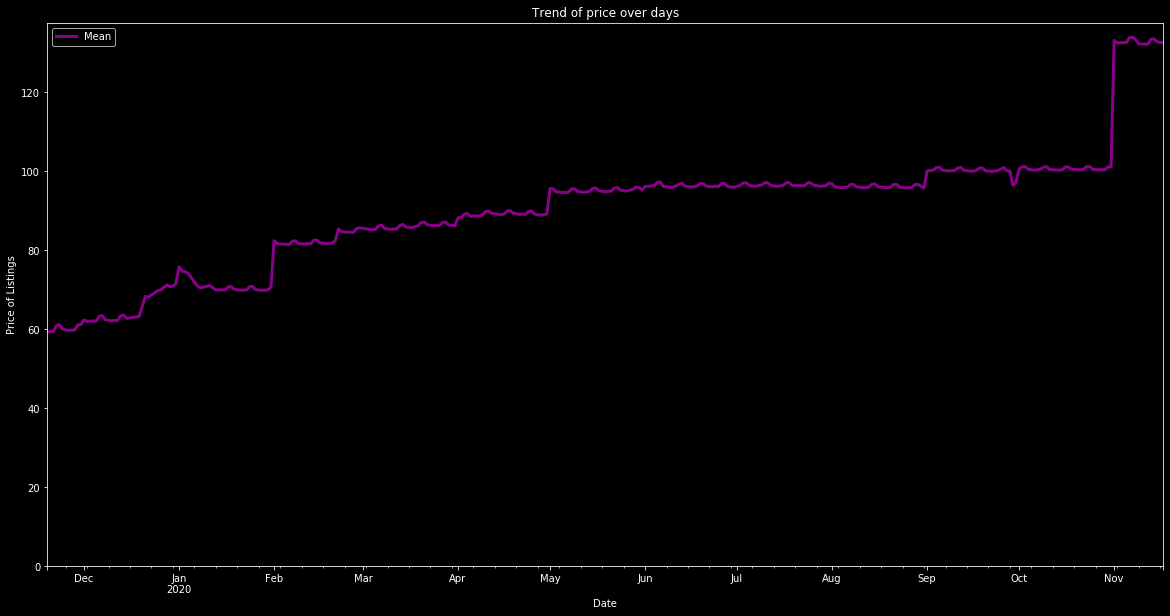

In [61]:
plt.style.use('fast')
cl2.time = pd.to_datetime(cl2['Date'], format='%Y-%m-%d %H:%M:%S.%f')
cl2.set_index(['Date'],inplace=True)
cl2.plot(figsize=(20, 10), color='darkmagenta', linewidth=3,kind='line', title='Trend of price over days') 
plt.ylim(0) # Set the lower y value to 0
plt.xlabel('Date') # Label of the x axis
plt.ylabel('Price of Listings') # Label of the y axis

## Listings per Host
 
<font color=blue>
    
Create a table with the number of listings per host, in descending order. Create a graph that will show the distribution of listings per host, as follows:

* You will rank the host on a number of listings basis. So, the first host will be the one with the largest number of listings, the second host will be the one with the second largest number of listings, etc. If there is a number of hosts with the same listings, just add them in sequence. For instance, if there are 10 hosts with one listing each, add them in the ranking with any order between them.

* On the $y$ axis you will have the number of listings.

That is, a point $(x, y)$ will mean that the $x$-th highest hosting host has $y$ listings.

After you have drawn the plot, do another one, this time with the $x$ axis in *logarithmic* scale.  </font>

<font color=purple>
To solve this one, we created a table with the id and the host id from the initial csv with the listings.Then we grouped by the host id and counted on the numer of listings, sorting the hoss in descenting order.
we created another column named "Rank' to rank the hosters on the number of their listings. While ploting the data, we can see that the distribution is uneven. There are little host that aquire a lot of listings and many hosts that have few listings. By transforming x axis to log scale the data is not so skewed. </font>

In [62]:
#Create a table with the number of listings per host, in descending order
df3= data[['id', 'host_id']]

In [63]:
df3 = data.groupby('host_id').agg({'id': ['size']}).reset_index()
df3.columns = ['host_id', 'count']
df3= df3.sort_values('count',ascending=False)
df3['Rank'] = df3['count'].rank(method='dense', ascending=False)#ranking
df3.head()

,host_id,count,Rank
2390,77457889,126,1.0
1201,29927830,94,2.0
77,748818,85,3.0
4179,182755179,83,4.0
140,1621474,78,5.0


In [64]:
plt.style.use('ggplot')

Text(0.5, 1.0, 'scatter plot with x in log scale')

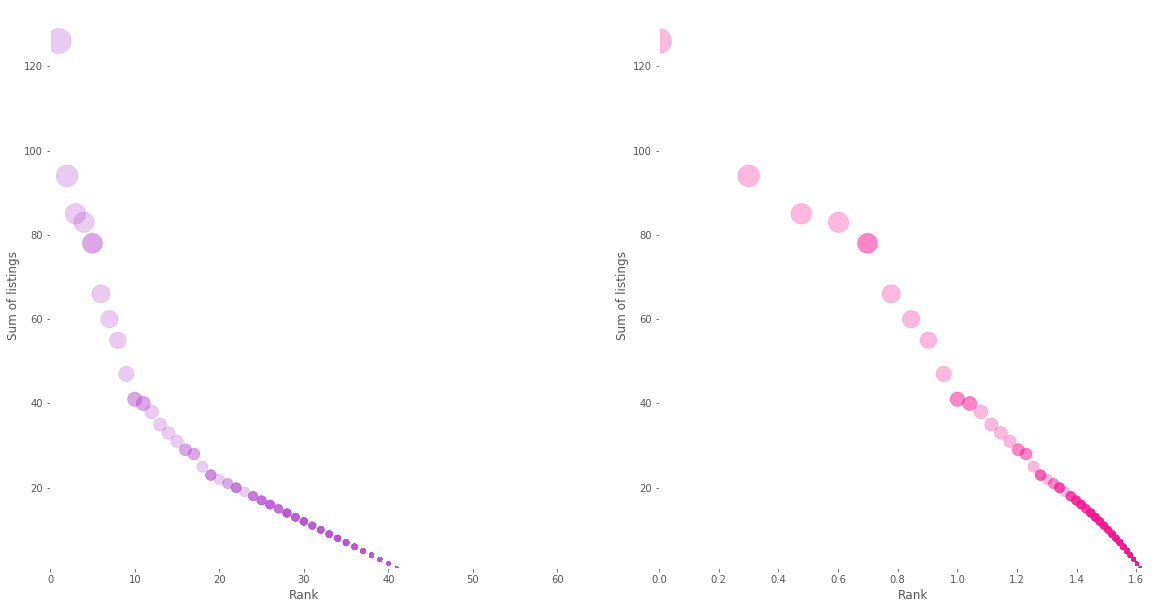

In [65]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.xlim(0, 60)
plt.ylim(1, 130)
plt.gca().set_facecolor('white')
plt.scatter(df3['Rank'], df3['count'],  alpha = 0.3, s=df3['count']*5, c='mediumorchid')
plt.xlabel('Rank') # Label of the x axis
plt.ylabel('Sum of listings') # Label of the y axis
plt.title("Initial scatter plot")

#log
plt.subplot(1, 2, 2)
plt.xlim(0, 1.7)
plt.ylim(1, 130)
plt.gca().set_facecolor('white')
plt.scatter(np.log10(df3['Rank']), df3['count'], alpha = 0.3, s=df3['count']*5, c='deeppink')
plt.xlabel('Rank') # Label of the x axis
plt.ylabel('Sum of listings') # Label of the y axis
plt.title("scatter plot with x in log scale")

## Visualize Listings

<font color=blue>
    
Draw an interactive map to show the listings ovelayed on Athens.

You can use the [folium](https://github.com/python-visualization/folium) library to create your map; spend some time reading the documentation.

The map should show each listing and on clicking on top of it, the user should see a short description of the listing.

Note that such a map is heavy on resources. You will probably *not* be able to include it in a Jupyter notebook, so you should save it to an external HTML file that can be opened by any browser. Also, to make things easier, you make wish to limit the maximum zoom level from 12 to 15 (after you read folium's documentation you will know what this is).

Hint: be careful witht he description data, if they contain some characters they may not be rendered in HTML and may destroy your output.  </font>

<font color=purple>
Initally, we are ready to use the folium.Map and project our listings onto this map. The folium Map constructor takes an initial starting co-ordinate to center the map on. I chose the mean of coordinates in the data set.
Next, we iterate over the dataframe and use the row values to assign category of listing a unique color. We then specify a popup string to be displayed when the user clicks on the marker. The marker itself, takes the location, popup and icon - the icon color is based on category of the listing associated with the listing. If you have some special characters that need to be html-escaped, you can use the parse_html=True option in Popup. </font>

In [66]:
import numpy as np
import pandas as pd
from shapely.geometry import Point, shape 
import folium
from folium import plugins
df = pd.read_csv('listings.csv', delimiter = ',')
map_center = [df["latitude"].mean(), df["longitude"].mean()]
map_Athens = folium.Map(location=map_center, zoom_start=12, tiles='cartodbpositron')
feature_ea = folium.FeatureGroup(name='Entire home/apt')
feature_pr = folium.FeatureGroup(name='Private room')
feature_sr = folium.FeatureGroup(name='Shared room')
feature_hr = folium.FeatureGroup(name='Hotel room')

for i, v in df.iterrows():
    popup = """
    Location id : <b>%s</b><br>
    Host name : <b>%s</b><br>
    Room type : <b>%s</b><br>
    Neighbourhood : <b>%s</b><br>
    Price : <b>%d</b><br>
    Minimum nights : <b>%d</b><br>
    """ % (v['id'], v['host_name'], v['room_type'], v['neighbourhood'], v['price'], v['minimum_nights'])
    
    if v['room_type'] == 'Entire home/apt':
        folium.Marker(location=[v['latitude'], v['longitude']],
                            icon=folium.Icon(color='orange', parse_html=False, icon='home'),
                            tooltip=popup,
                            fill=True).add_to(feature_ea)
    elif v['room_type'] == 'Private room':
        folium.Marker(location=[v['latitude'], v['longitude']],
                            icon=folium.Icon(color='blue', parse_html=False, icon='home'),
                             tooltip=popup,
                            fill=True).add_to(feature_pr)
    elif v['room_type'] == 'Shared room':
        folium.Marker(location=[v['latitude'], v['longitude']],
                            icon=folium.Icon(color='red', parse_html=False, icon='home'),
                            tooltip=popup,
                            fill=True).add_to(feature_sr)
    elif v['room_type'] == 'Hotel room':
        folium.Marker(location=[v['latitude'], v['longitude']],
                            icon=folium.Icon(color='green', parse_html=False, icon='home'),
                            tooltip=popup,
                            fill=True).add_to(feature_hr)

feature_ea.add_to(map_Athens)
feature_pr.add_to(map_Athens)
feature_sr.add_to(map_Athens)
feature_hr.add_to(map_Athens)
folium.LayerControl(collapsed=False).add_to(map_Athens)


#generate map and save as local file
map_Athens.save('AIRBNBMAP_athens.html')